In [24]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
#from sklearn.metrics import accuracy_score
#import numpy as np
#import matplotlib.pyplot as plt



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/heart.csv')
data.head()

# Split features and target
X = data.drop("target", axis=1)  # Features
y = data["target"]               # Target (0 = No disease, 1 = Disease)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


Train the Decision Tree Classifier


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Note: The size of the graph cannot be directly controlled through export_graphviz.
# To adjust the size, you would need to modify the generated DOT data string or use a different visualization library.

DecisionTreeClassifier(random_state=42)

 Visualize the Tree

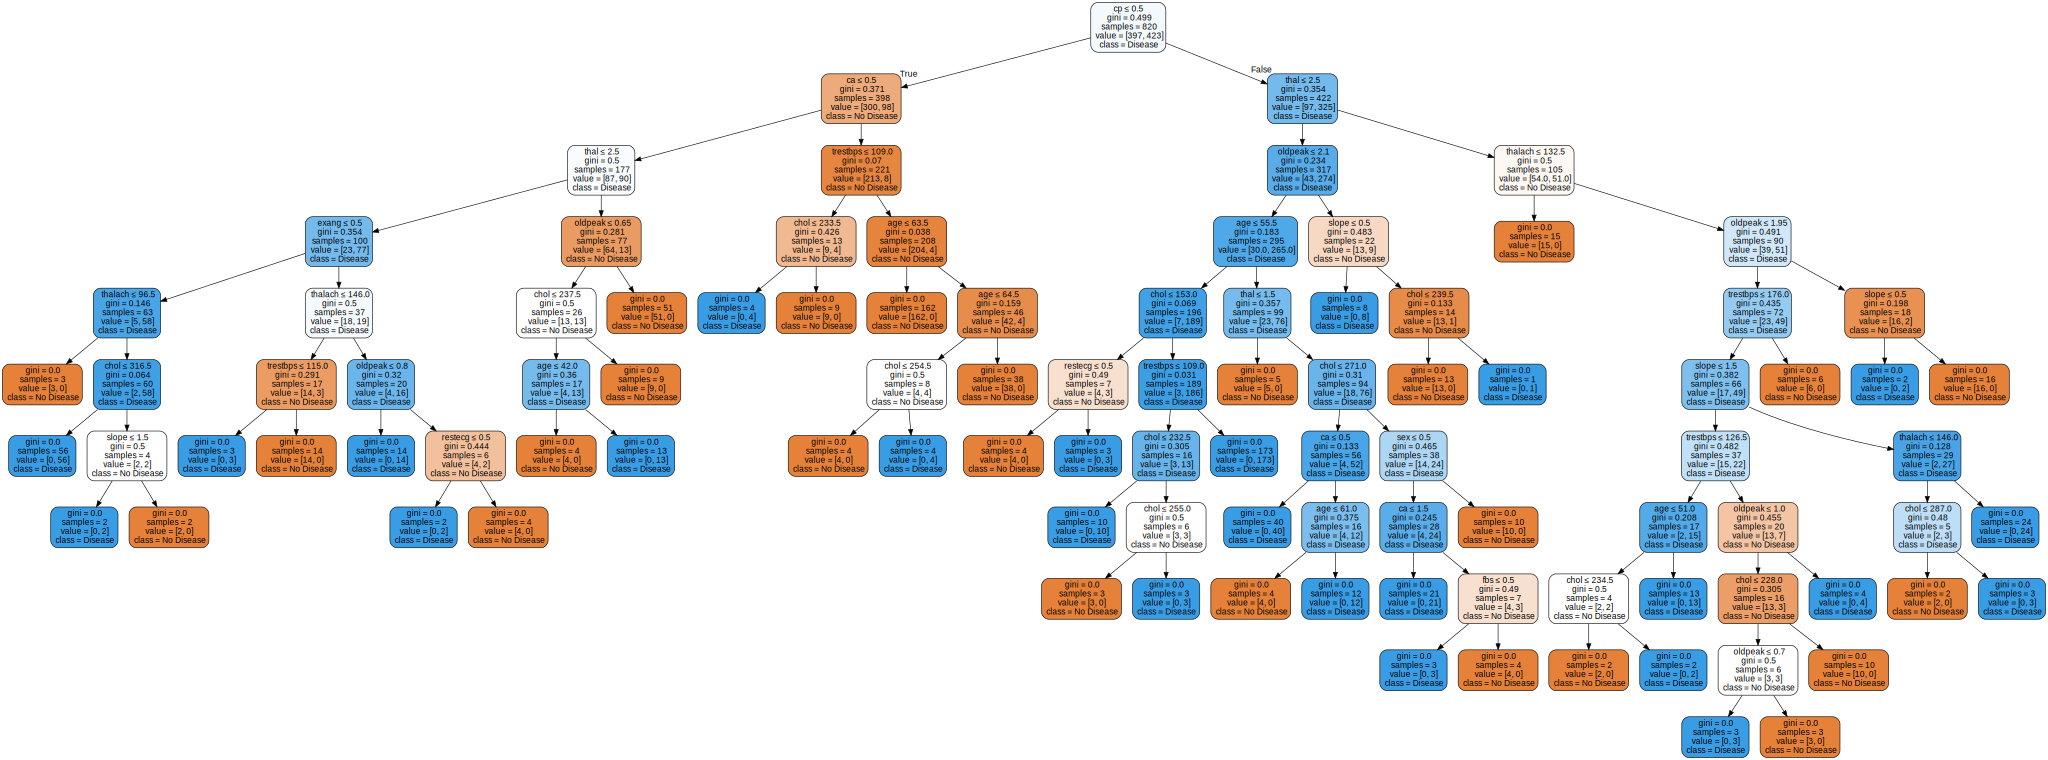

In [14]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree to DOT format
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True, rounded=True,
    special_characters=True
)

# Visualize with Graphviz

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # saves file
graph


In [15]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.9853658536585366


Understanding Overfitting in Decision Trees
Overfitting happens when the tree is too deep and learns noise in the training data.

Symptoms:

High training accuracy (close to 1.0).

Much lower test accuracy (poor generalization).

Reason: Decision Trees split until every leaf is pure unless we stop them.

**2. Checking for Overfitting
Let’s compare a default deep tree vs. a restricted tree:**

If you see Train ≫ Test, that’s overfitting.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Deep tree (no depth restriction)
dt_deep = DecisionTreeClassifier(random_state=42)
dt_deep.fit(X_train, y_train)

train_acc_deep = dt_deep.score(X_train, y_train)
test_acc_deep = dt_deep.score(X_test, y_test)

print("Deep Tree - Train Accuracy:", train_acc_deep)
print("Deep Tree - Test Accuracy:", test_acc_deep)

Deep Tree - Train Accuracy: 1.0
Deep Tree - Test Accuracy: 0.9853658536585366


**Controlling Tree Depth**

You can reduce overfitting by controlling:

max_depth → limit tree levels

min_samples_split → require more samples to split

min_samples_leaf → require more samples per leaf

In [17]:
# Limit depth
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

train_acc_limited = dt_limited.score(X_train, y_train)
test_acc_limited = dt_limited.score(X_test, y_test)

print("Limited Tree - Train Accuracy:", train_acc_limited)
print("Limited Tree - Test Accuracy:", test_acc_limited)

Limited Tree - Train Accuracy: 0.8829268292682927
Limited Tree - Test Accuracy: 0.8


**Finding the Best Depth**

We can test multiple depths to see which works best:

In [18]:
best_depth = None
best_test_acc = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"Depth {depth}: Train={model.score(X_train, y_train):.3f}, Test={test_acc:.3f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_depth = depth

print(f"\nBest Depth: {best_depth} with Test Accuracy: {best_test_acc:.3f}")

Depth 1: Train=0.762, Test=0.751
Depth 2: Train=0.770, Test=0.678
Depth 3: Train=0.851, Test=0.780
Depth 4: Train=0.883, Test=0.800
Depth 5: Train=0.929, Test=0.844
Depth 6: Train=0.949, Test=0.883
Depth 7: Train=0.973, Test=0.917
Depth 8: Train=0.990, Test=0.976
Depth 9: Train=0.996, Test=0.980
Depth 10: Train=1.000, Test=0.985

Best Depth: 10 with Test Accuracy: 0.985


**Why Random Forest?**


Random Forest = Many Decision Trees trained on different random subsets of data and features.

Reduces overfitting because predictions are averaged.

Usually has better test accuracy than a single decision tree.



**2. Training a Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,  # number of trees
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


**3. Comparing with Decision Tree**

Let’s reuse the limited-depth Decision Tree from Step 2:

In [20]:
# Compare Accuracies
print("Decision Tree Accuracy (max_depth=4):", test_acc_limited)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy (max_depth=4): 0.8
Random Forest Accuracy: 0.9853658536585366


**You’ll often find:**

Decision Tree → good train accuracy, slightly lower test accuracy.

Random Forest → slightly lower train accuracy, higher test accuracy.

4. Optional: Cross-Check Overfitting

In [21]:
print("Random Forest Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))


Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9853658536585366


**1. What are Feature Importances?**

They tell us how much each feature contributed to the model’s predictions.

In Decision Trees & Random Forests:

The more a feature reduces impurity (Gini/Entropy), the higher its importance score.

Values are normalized so they sum to 1.

In [22]:
import numpy as np

# Get feature importances from the trained Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Print rankings
print("Feature Importances:")
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]} - {importances[indices[i]]:.4f}")

Feature Importances:
1. cp - 0.1351
2. ca - 0.1273
3. thalach - 0.1222
4. oldpeak - 0.1219
5. thal - 0.1105
6. age - 0.0779
7. chol - 0.0748
8. trestbps - 0.0712
9. exang - 0.0576
10. slope - 0.0458
11. sex - 0.0287
12. restecg - 0.0186
13. fbs - 0.0084


**3. Visualize Feature Importances**

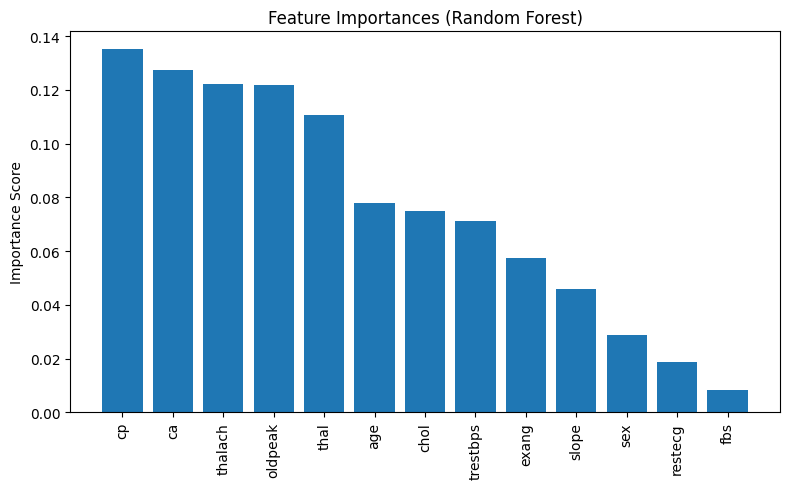

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

**4. How to Interpret**

High score → feature is more useful for classification.

Example for heart dataset:

  cp (chest pain type) or thalach (max heart rate) may have high importance.
  fbs (fasting blood sugar) might have low importance.

**5. Practical Use**

Identify key predictors for the problem.

Possibly drop low-importance features for simpler models.

Aid in domain understanding (doctors, analysts, etc.).

**1. Why Cross-Validation?**

A single train/test split may give a lucky or unlucky accuracy.

Cross-validation splits the dataset into k folds:

Train on k-1 folds.

*   Test on the remaining fold.
*   Repeat k times and average results.



Gives a more stable and reliable performance estimate.

**2. Evaluate Random Forest with Cross-Validation**

In [25]:
from sklearn.model_selection import cross_val_score
#import numpy as np

# 5-Fold Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


**3. Compare with Decision Tree**

In [26]:
dt_cv_scores = cross_val_score(dt_limited, X, y, cv=5)
print("Decision Tree (max_depth=4) CV Scores:", dt_cv_scores)
print("Decision Tree Mean CV Accuracy:", np.mean(dt_cv_scores))

rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Accuracy:", np.mean(rf_cv_scores))

Decision Tree (max_depth=4) CV Scores: [0.84390244 0.83414634 0.87317073 0.80487805 0.81463415]
Decision Tree Mean CV Accuracy: 0.8341463414634147
Random Forest CV Scores: [1.         1.         1.         1.         0.98536585]
Random Forest Mean CV Accuracy: 0.9970731707317073


4. Interpreting the Results


*   Higher mean CV accuracy → better generalization.

*   Lower standard deviation → more stable predictions across folds.

*   Random Forest should generally have both higher mean accuracy and stability.

**Now we have have:**

Trained & visualized a Decision Tree.

Controlled overfitting with depth limits.

Compared with Random Forest.

Extracted feature importances.

Validated models using cross-validation.